<h1 style="color:rgb(0,120,170)">Assignment 5: Factor Analysis</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1 (25 Points): Generate toy data for FA</h2>

Generate an $n \times m$ data matrix $\mathbf{X}$, i.e. $n=100$ samples with $m=5$ features, according to the generative factor analysis model with $l=3$ factors. Further, fill $\mathbf{U}$ with random integers from the set $\{-3, \dots, 3\}$ and $\mathbf{\Psi}$ with random integers from the set $\{1, \dots, 3\}$. To save memory, implement $\mathbf{\Psi}$ as a vector. 

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Y = np.random.randn(100, 3)
U = np.random.randint(-3, 3, (5, 3))
Psi = np.random.randint(1, 3, 5)
E = np.random.normal(0, Psi, (100,5))
X = Y @ U.T + E

<h2 style="color:rgb(0,120,170)">Task 2 (25 Points): Derive GD for FA</h2>

Construct the negative log-likelihood $\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})$, according to the FA model assumptions and show that its gradients with respect to the model parameters are $\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi}) = 2 \mathbf{P}\mathbf{U}$ and $\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \operatorname{diag}(\operatorname{diag}(\mathbf{P}))$, where $\mathbf{P} = \nabla_{\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) = \frac12 \mathbf{Q} - \frac{1}{2n} \mathbf{Q} \mathbf{X}^\top \mathbf{X} \mathbf{Q}$ and $\mathbf{Q} = (\mathbf{U}\mathbf{U}^\top + \mathbf{\Psi})^{-1}$. Hint: use the fact that for any scalar valued function $f$ and real matrix $\mathbf{X}$ it holds that $\nabla_{\mathbf{X}} f(\mathbf{X}^\top \mathbf{X}) = 2 \mathbf{X} \nabla_{\mathbf{X}^\top \mathbf{X}} f(\mathbf{X}^\top \mathbf{X})$. 

$$-\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})=-\log \prod_{i=1}^n (2\pi)^{-m/2}|\mathbf{U}\mathbf{U}^T+\Psi|^{-1/2}\exp\Big(-\frac{1}{2}\big(\mathbf{x}_i^T(\mathbf{U}\mathbf{U}^T+\Psi)^{-1}\mathbf{x}_i\big)\Big)= \text{ (see manuscript)}$$
$$\frac{nm}{2}\log(2\pi)+\frac{n}{2}\log(|\mathbf{U}\mathbf{U}^T+\Psi|)+\frac{1}{2}\sum_{i=1}^{n}\big(\mathbf{x}_i^T(\mathbf{U}\mathbf{U}^T+\Psi)^{-1}\mathbf{x}_i\big)$$

<br><br>

Since 
$\frac{\partial}{\partial \mathbf{X}} \log \det \mathbf{X} = \frac{1}{\det \mathbf{X}} \frac{\partial \det \mathbf{X}}{\partial \mathbf{X}} =\frac{1}{\det \mathbf{X}} \mathrm{adj}(\mathbf{X}) = \mathbf{X}^{-1}$,

$\frac{\partial \mathbf{X}^{-1}}{\partial \mathbf{X}} = -\mathbf{X}^{-2} = -\mathbf{X}^{-1}\mathbf{X}^{-1}$ and

$\frac{\partial f(\mathbf{U}\mathbf{U}^T)}{\partial\mathbf{U}}=2(\frac{f(\mathbf{U}\mathbf{U}^T)}{\partial \mathbf{U}\mathbf{U}^T})^T\mathbf{U}\text{ (Hint!)}$, the following holds:

$$\nabla_\mathbf{U}\ell(\mathbf{U},\mathbf{\Psi})=\frac{n}{2}2\mathbf{Q}\mathbf{U}+\frac{1}{2}\sum_{i=1}^{n}-2\mathbf{Q}\mathbf{x}_i\mathbf{x}_i^T\mathbf{Q}\mathbf{U}$$

Because $\mathbf{x}_i$ are column vectors, we can rewrite this formula like follows:

$$\nabla_\mathbf{U}\ell(\mathbf{U},\mathbf{\Psi})=n\mathbf{Q}\mathbf{U}-\mathbf{Q}\mathbf{X}^T\mathbf{X}\mathbf{Q}\mathbf{U}$$

Now by dividing and multiplying be 2, factoring out $\mathbf{U}$ and using the definition for $\mathbf{P}$, we end up with:

$$\nabla_\mathbf{U}\ell(\mathbf{U},\mathbf{\Psi})=n2\mathbf{P}\mathbf{U}$$

Now, in order to in order to produce the sample normalized version of the gradient (this doesn't change the optimum), we can divide by $n$:

$$\frac{1}{n}\nabla_\mathbf{U}\ell(\mathbf{U},\mathbf{\Psi})=2\mathbf{P}\mathbf{U}$$

<br><br>

Applying the same rules as above:

$$\nabla_\mathbf{\Psi}\ell(\mathbf{U},\mathbf{\Psi})=\frac{n}{2}\mathbf{Q}+\frac{1}{2}\sum_{i=1}^{n}-\mathbf{Q}\mathbf{x}_i\mathbf{x}_i^T\mathbf{Q}$$

Because $\mathbf{x}_i$ are column vectors, we can rewrite this formula like follows:

$$\nabla_\mathbf{\Psi}\ell(\mathbf{U},\mathbf{\Psi})=\frac{n}{2}\mathbf{Q}-\frac{1}{2}\mathbf{Q}\mathbf{X}^T\mathbf{X}\mathbf{Q}$$

Now by using the definition for $\mathbf{P}$, we end up with:

$$\nabla_\mathbf{\Psi}\ell(\mathbf{U},\mathbf{\Psi})=n\mathbf{P}$$

Again, we can sample normalize this gradient by dividing by $n$:

$$\frac{1}{n}\nabla_\mathbf{\Psi}\ell(\mathbf{U},\mathbf{\Psi})=\mathbf{P}$$

<h2 style="color:rgb(0,120,170)">Task 3 (25 Points): Implement GD for FA</h2>

Use your results from the previous task to implement gradient descent on the negative log-likelihood for factor analysis. Initialize $\mathbf{U}$ and $\mathbf{\Psi}$ randomly uniform in $[-0.1, 0.1]$. To speed up computations, use the matrix inversion lemma $(\mathbf{UU}^\top + \mathbf{\Psi})^{-1} = \mathbf{\Psi}^{-1} - \mathbf{\Psi}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{U^\top \mathbf{\Psi}^{-1} \mathbf{U}})^{-1}\mathbf{U}^\top \mathbf{\Psi}^{-1}$ wherever possible and adjust the learning rate properly. Since we know the true parameters $\bar{\mathbf{U}}$ and $\bar{\mathbf{\Psi}}$ for our toy data set, we can measure the loss by $\lVert \bar{\mathbf{U}}\bar{\mathbf{U}}^\top + \bar{\mathbf{\Psi}} - \mathbf{U}\mathbf{U}^\top - \mathbf{\Psi} \rVert$. Visualize the learning progress over 1000 update steps of 10 runs which differ only by initializiation in terms of this matrix (i.e. Frobenius) norm expression.

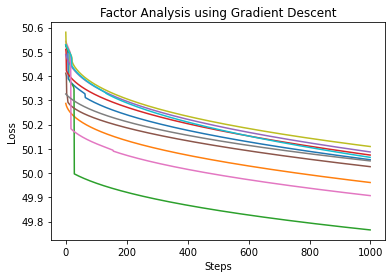

In [30]:
def calc_Q(U, Psi):
    """
    Calculate the inverse of the covariance matrix using the matrix inversion lemma.
    """
    Psi_inv = np.diag(1/Psi)
    return Psi_inv - Psi_inv @ U @ np.linalg.inv(np.identity(U.shape[1]) + U.T @ Psi_inv @ U) @ U.T @ Psi_inv

def grad_descent(X, U, Psi, learning_rate, n_runs=10, n_steps=1000):
    
    for _ in range(n_runs):
        
        # Initialization
        U_bar, Psi_bar = np.random.uniform(-0.1, 0.1, (5, 3)), np.random.uniform(-0.1, 0.1, 5)
        losses = []
        n = len(X)

        for _ in range(n_steps):
            
            Q = calc_Q(U_bar, Psi_bar)
            P = (1/2) * Q - (1/(2*n)) * (Q @ X.T @ X @ Q)
            
            # Gradient Calculation
            grad_U = 2 * P @ U_bar
            grad_Psi = np.diag(P)
            
            # Step
            U_bar -= learning_rate * grad_U
            Psi_bar -= learning_rate * grad_Psi

            loss = np.linalg.norm(U_bar @ U_bar.T + np.diag(Psi_bar) - U @ U.T - np.diag(Psi))
            losses.append(loss)

        plt.plot(np.arange(0, n_steps), losses)

    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Factor Analysis using Gradient Descent')
    plt.show()

grad_descent(X, U, Psi, 1e-6)

<h2 style="color:rgb(0,120,170)">Task 4 (25 Points): Implement EM for FA</h2>

Implement expectation maximization for factor analysis. Use the same data and initialization scheme as in the previous task. Visualize the learning progress over 100 update steps in terms of the loss function $\lVert \bar{\mathbf{U}}\bar{\mathbf{U}}^\top + \bar{\mathbf{\Psi}} - \mathbf{U}\mathbf{U}^\top - \mathbf{\Psi} \rVert$ for 10 runs which differ only by initialization. Compare your results to those in the previous exercise and interpret the ovserved differences. 

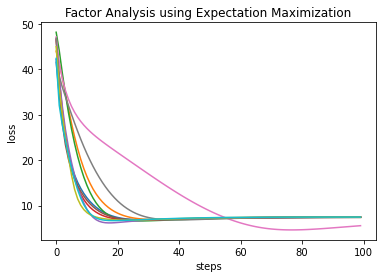

In [32]:
def em(X, U, Psi, n_runs=10, n_steps=100):
    
    for _ in range(n_runs):
        
        # Initialization
        U_bar, Psi_bar = np.random.uniform(-0.1, 0.1, (5, 3)), np.random.uniform(-0.1, 0.1, 5)
        losses = []
        n = len(X)

        for _ in range(n_steps):

            Q = calc_Q(U_bar, Psi_bar)

            # E-step
            E_y = [U_bar.T @ Q @ x for x in X]
            E_yy = [np.outer(e_y, e_y.T) + np.identity(U_bar.shape[1]) - U_bar.T @ Q @ U_bar for e_y in E_y]

            # M-step
            E_xy = [np.outer(x, e_y.T) for x, e_y in zip(X, E_y)]
            U_bar = ((1/n) * np.sum(E_xy, axis=0)) @ np.linalg.inv((1/n) * np.sum(E_yy, axis=0))

            Psi_bar = (1/n) * np.diag(np.sum([np.outer(x,x.T) for x in X], axis=0) - np.sum(E_xy, axis=0) @ U_bar.T)

            loss = np.linalg.norm(U_bar @ U_bar.T + np.diag(Psi_bar) - U @ U.T - np.diag(Psi))
            losses.append(loss)

        plt.plot(np.arange(0, 100), losses)
        
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.title('Factor Analysis using Expectation Maximization')
    plt.show()

em(X, U, Psi)

## GD vs EM
### Differences
- Loss of EM converges, loss of GD does not (at least not after 1000 steps)
- Overall loss of EM is lower than loss of GD
- Loss of EM decreases faster then of GD
- With GD, there is a chance of exploding gradients, depending on initialization of U and Psi (can be seen when GD is executed a few times); this is not the case for EM (at least not observed)

### Reasons
EM always searches for zero-gradient, therefore moves to the current optimum in every step, this is not the case for GD, which just moves in the direction of the optimum. Therefore, EM converges faster than GD.